In [10]:
#Roll.No:CS21B2026
#Name:P.Veera Abhiram
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt

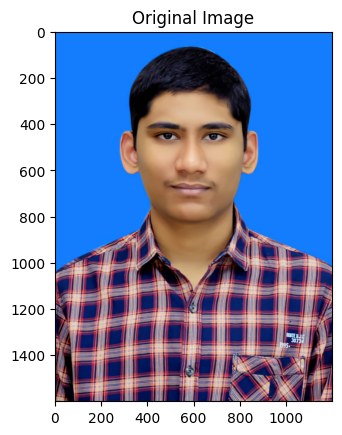

In [11]:
#read image 
original_image = cv.imread('me.jpg')
img_rgb = cv.cvtColor(original_image, cv.COLOR_BGR2RGB) 
#show image
plt.imshow(img_rgb)
plt.title('Original Image')
plt.show()


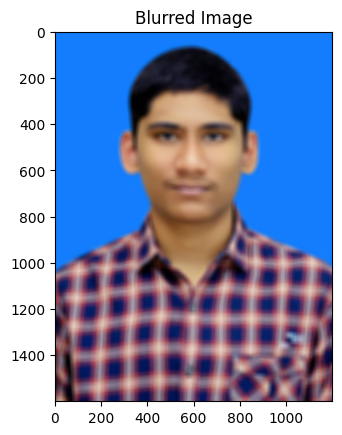

In [12]:
#blur image
blurred_image = cv.blur(original_image, (25,25))
blurred_image = cv.cvtColor(blurred_image, cv.COLOR_BGR2RGB)
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.show()

Gaussian Noise: [[[231 235  18]
  [ 13 254 242]
  [  6 241 252]
  ...
  [ 13 247 247]
  [231  18   5]
  [ 12 218 220]]

 [[210   5  21]
  [  0 250   8]
  [ 21 246  14]
  ...
  [225 219   7]
  [ 13  28 208]
  [215  11  25]]

 [[  3 250  26]
  [242  23 253]
  [253 244  12]
  ...
  [247   3 235]
  [ 21   0  26]
  [228 230  15]]

 ...

 [[253  26 236]
  [226 253  13]
  [224  28  25]
  ...
  [  9 225 253]
  [ 31 219  50]
  [ 27  22 219]]

 [[238 232 226]
  [ 11 253  12]
  [ 15 234 236]
  ...
  [251  13  31]
  [ 15 253   6]
  [206  15   0]]

 [[  7   2 252]
  [ 18  28  14]
  [  2  20  44]
  ...
  [233 226 218]
  [254 230  19]
  [243 236  42]]]


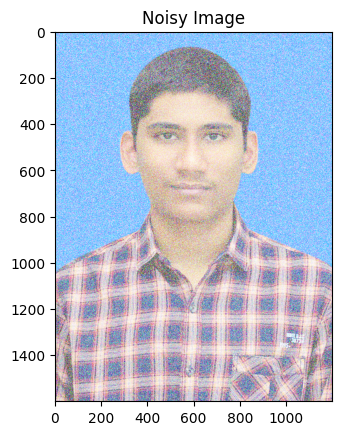

True

In [13]:
#add gaussian noise
mean = 0
std = 25
gaussian_noise = np.random.normal(mean, std, img_rgb.shape).astype('uint8')
print("Gaussian Noise:", gaussian_noise)
noisy_image = cv.add(img_rgb, gaussian_noise)
plt.imshow(noisy_image)
plt.title('Noisy Image')
plt.show()
cv.imwrite('degraded_image.jpg', cv.cvtColor(noisy_image, cv.COLOR_RGB2BGR))

In [14]:
#decompress image jpeg2000
cv.imwrite('Images/degraded-image.jp2', noisy_image, [int(cv.IMWRITE_JPEG2000_COMPRESSION_X1000), 70])
decompressed_image = cv.imread('degraded-image.jp2')

In [15]:
#image quality metrics
#mse 
def calculate_mse(original_image, noisy_image):
    mse = np.mean((original_image - noisy_image) ** 2)
    return mse

mse = calculate_mse(img_rgb, noisy_image)
print('MSE:', mse)

#psnr
def calculate_psnr(mse):
    psnr = 20 * math.log10(255 / math.sqrt(mse))
    return psnr

psnr = calculate_psnr(mse)
#psnr in dB
print('PSNR:', psnr, 'dB')

MSE: 83.13943888888889
PSNR: 28.93273271757152 dB
